# ORIE 3120

Jeremy Ben-Meir (jsb459), Sunny Chavan (), Steven Urdaneta ()

Monday, April 18, 2022

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import sys
!{sys.executable} -m pip install gender_guesser
import gender_guesser.detector as gender

Import relevant data

In [24]:
listings_df = pd.read_csv("listings.csv")
listings_df["last_review"] = listings_df["last_review"].astype('datetime64[ns]')
listings_df.head()

/var/folders/__/xdj9wy117vzd8wjwwhpp9sph0000gn/T/ipykernel_4736/1326942325.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv("listings.csv")


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20220305031505,2022-03-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.32
1,5121,https://www.airbnb.com/rooms/5121,20220305031505,2022-03-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.32
2,5136,https://www.airbnb.com/rooms/5136,20220305031505,2022-03-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
3,5178,https://www.airbnb.com/rooms/5178,20220305031505,2022-03-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.43,4.87,4.37,NaN,f,1,0,1,0,3.33
4,5203,https://www.airbnb.com/rooms/5203,20220305031505,2022-03-30,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.77


In [25]:
neighbourhoods_df = pd.read_csv("neighbourhoods.csv")
neighbourhoods_df.head()

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [26]:
reviews_df = pd.read_csv("reviews.csv")
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


Plot fields

In [27]:
# sns.pairplot(listings_df)

Not all of these relationships are interesting...

In [28]:
listings_df_limited = listings_df.drop(["id","latitude","longitude","host_id"],axis=1)
# sns.pairplot(listings_df_limited)

One-on-one relationships

/var/folders/__/xdj9wy117vzd8wjwwhpp9sph0000gn/T/ipykernel_4736/3123837984.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings_df["price"] = listings_df['price'].str.replace("$","").str.replace(",","").astype(float)


Text(0.5, 1.0, 'Figure 3: Price vs. Number of Reviews')

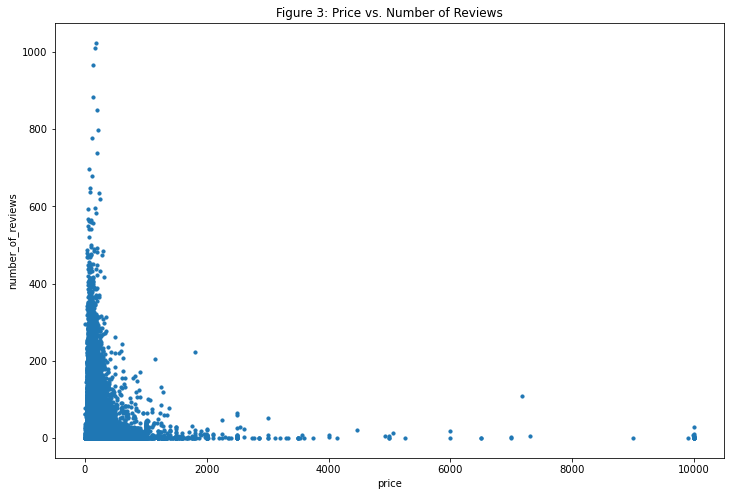

In [29]:
fig, ax = plt.subplots(figsize=(12,8))
listings_df["price"] = listings_df['price'].str.replace("$","").str.replace(",","").astype(float)
listings_df["minimum_nights"] = listings_df["minimum_nights"].astype(float)
listings_df["price_nightly"] = listings_df["price"]#*(listings_df["minimum_nights"]/1000.0).pow(.5)
plt.scatter(listings_df["price"],listings_df["number_of_reviews"],s=10)
plt.xlabel("price")
plt.ylabel("number_of_reviews")
listings_df[(listings_df["price"]>=500)&(listings_df["price"]>500)]["number_of_reviews"].mean()
plt.title("Figure 3: Price vs. Number of Reviews")


Text(0.5, 1.0, 'Figure 4: Minimum Nights vs. Number of Reviews')

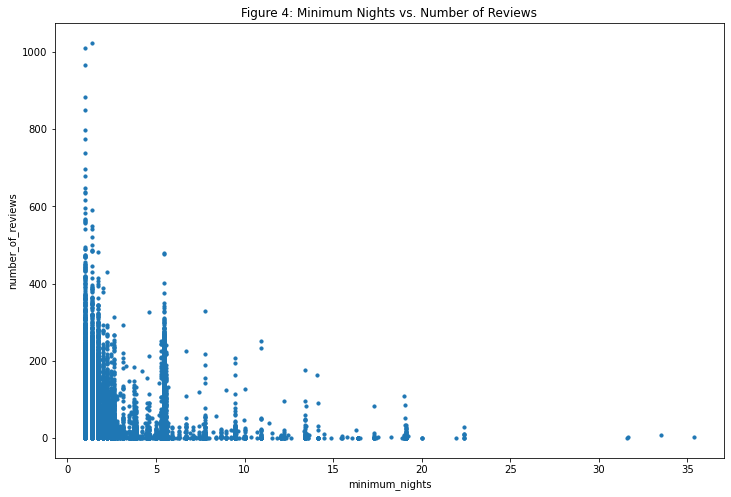

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
listings_df["sq_minimum_nights"] = listings_df["minimum_nights"].pow(1/2)
plt.scatter(listings_df["sq_minimum_nights"],listings_df["number_of_reviews"],s=10)
plt.xlabel("minimum_nights")
plt.ylabel("number_of_reviews")
plt.title("Figure 4: Minimum Nights vs. Number of Reviews")


Text(0, 0.5, 'minimum_nights')

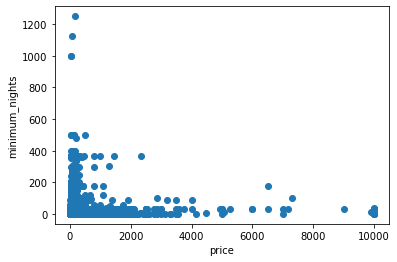

In [31]:
plt.scatter(listings_df["price"],listings_df["minimum_nights"])
plt.xlabel("price")
plt.ylabel("minimum_nights")

Plotting categorical variables & date

In [32]:
print(listings_df["neighbourhood_group_cleansed"].unique())
print(listings_df["room_type"].unique())

['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


Text(0.5, 1.0, 'Figure 5: Landlord Inferred Gender vs. Number of Reviews')

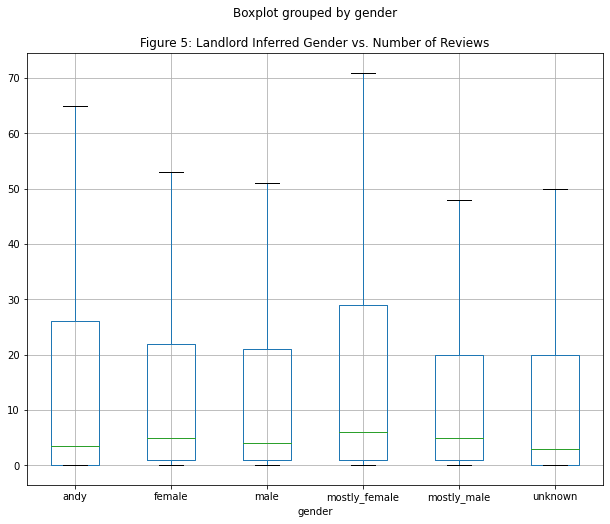

In [33]:
d = gender.Detector()
listings_df["gender"] = listings_df["host_name"].apply(lambda x : d.get_gender(x))

fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
listings_df.boxplot(column='number_of_reviews',by="gender",ax=ax,showfliers=False)
plt.title("Figure 5: Landlord Inferred Gender vs. Number of Reviews")

neighbourhood_group_cleansed
Bronx            104.946800
Brooklyn         134.872973
Manhattan        218.186187
Queens           113.591844
Staten Island    121.877612
Name: price, dtype: float64


Text(0.5, 1.0, 'Figure 1: Price by Borough')

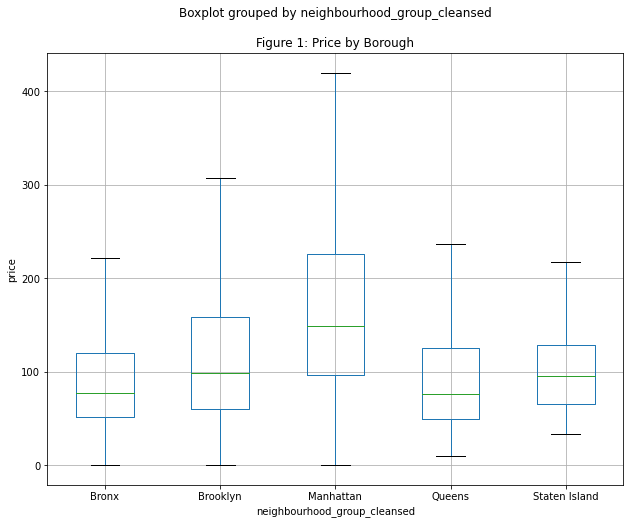

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
print(listings_df.groupby('neighbourhood_group_cleansed')['price'].mean())
listings_df.boxplot(column='price',by="neighbourhood_group_cleansed",ax=ax,showfliers=False)
plt.ylabel("price")
plt.title("Figure 1: Price by Borough")

['Queens', 'Staten Island', 'Manhattan', 'Manhattan', 'Queens', 'Bronx', 'Manhattan', 'Manhattan', 'Manhattan', 'Staten Island', 'Manhattan', 'Queens', 'Manhattan', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Manhattan']


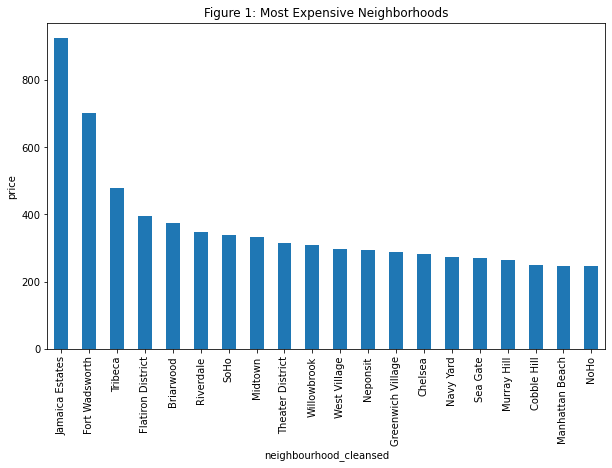

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {"Bronx": 'r', "Brooklyn": 'b', "Manhattan": 'g', "Queens": 'y', "Staten Island": 'orange'}
no_demand = listings_df.groupby('neighbourhood_cleansed')['number_of_reviews'].sum().sort_values()[:10].index.to_list()
listings_df = listings_df[~listings_df["neighbourhood"].isin(no_demand)]
neighborhood_prices = listings_df.groupby('neighbourhood_cleansed').agg({'neighbourhood_group_cleansed':"max",'price_nightly':"mean"}).sort_values("price_nightly",ascending=False)
color_col = neighborhood_prices['neighbourhood_group_cleansed'][:20].to_list()
neighborhood_prices['price_nightly'][:20].plot.bar()#color=[colors[i] for i in color_col])
plt.ylabel("price")
plt.title("Figure 1: Most Expensive Neighborhoods")

print(color_col)


In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
plt.suptitle('')
listings_df.boxplot(column='number_of_reviews',by="neighbourhood_group",ax=ax,showfliers=False)
plt.ylabel("number_of_reviews")

In [ ]:
plt.scatter(listings_df["number_of_reviews"],listings_df["last_review"])
plt.xlabel("number_of_reviews")
plt.ylabel("last_review")